# Digital Image Processing - Problem Set 1

## Student Names: 
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Instructions

This first Problem Set covers the topics of basic image manipulation, spatial resolution and intensity level resolution. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

En la celda siguiente se importan las librerías necesarias, se definen ciertas variables globales, como el camino a las imágenes, una lista con imágenes a utilizar y una función global llamada rg, que retorna la imagen como un arreglo de numpy (para acortar los códigos de las secciones siguientes).<br>
**Antes de ejecutar cualquier otra celda, corra esta primero.**

### Definitions

In [1]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import cv2
import matplotlib.pyplot as mplt


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = ['cameraman.png', 'moon.jpg', 'rose.bmp', 'skull.bmp', 'Woman.bmp','hut.jpg']

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

<b>1. </b>Load image from a file and display the image. Determine the size of the image. Finally, save a new copy of the image in a new file.<br /> <br />

Para resolver este punto, primero guardamos en la variable img1 la imagen que vamos a utilizar, esto lo hacemos llamando la función 'rg' que lee una imagen en escala de grices. Esta función recibe el nombre de la foto como parámetro, en este caso el primer elemento de la lista files, la cual contiene todos los nombres de las imágenes utilizadas en el taller. Luego, con img1.shape, creamos una tupla que contiene a hg y wd, que son height y width respectivamente; mostramos entonces en consola el valor de cada una de estas variables para saber su tamaño. Seguidamente con mplt.figure creamos una nueva figura, la cual mostrará img1 que es la imagen original en escala de grises. Luego, en img2 hacemos una copia de img1 para poder guardarla en un nuevo archivo con cv2.imwrite. Finalmente, agregarmos esta nueva imagen con el nombre 'new_cameraman.png' en la lista files.

height: 256
width: 256
['cameraman.png', 'moon.jpg', 'rose.bmp', 'skull.bmp', 'Woman.bmp', 'hut.jpg', 'new_cameraman.png']


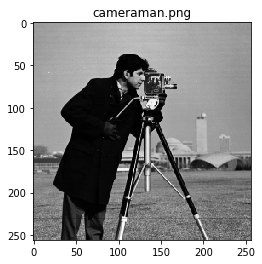

In [5]:
img1 = rg(files[0])

hg, wd = img1.shape # function that returns a tuple with 2 parameters
print 'height: ' + str(hg)
print 'width: '+ str(wd)

mplt.figure()
mplt.imshow(img1, cmap='gray')
mplt.title(files[0])

img2 = img1.copy() 
cv2.imwrite(pth + 'new_cameraman.png', img2) # create a new file called 'cameraman_new.png'
if files[-1] != 'new_cameraman.png': 
    files.append('new_cameraman.png') # add the new element to the list
print files # checking 

<b>2. </b>Write a function <code>flip_image</code>, which flips an image either vertically or horizontally. The function should take two input parameters: the matrix storing the image data and a flag to indicate whether the image should be flipped vertically or horizontally. Use this function to flip an example image both vertically and horizontally. <b>Tip:</b> You can use numpy array indexing or OpenCV's <a href="http://docs.opencv.org/modules/core/doc/operations_on_arrays.html#flip">flip</a> function to solve this problem. <br /> <br />

En este punto, primero guardamos en la variable img la imagen que utilizaremos. Luego de guardarla, procedemos a crear nuestra función flip_image que recibe los parámetros 'im_data' que es la matriz de la imagen (img) y el parámetro 'flag' que indica el eje en que queremos rotar la imagen. 1 significa rotar en el eje y (verticalmente), mientras 0 rota en el eje x (horizontalmente). Dentro de la función retornamos im_flip que es una variable que almacena el resultado de usar la función cv2.flip. Ahora, en la variable vert guardamos el resultado de llamar la función que creamos antes con los parámetros img y 1; lo mismo pasa con la variable hor, pero con flag = 0. Para mostrar las tres imágenes, creamos una lista con las tres variables que necesitamos, img, vert y hor, para luego mostrarlas con mplt.imshow.

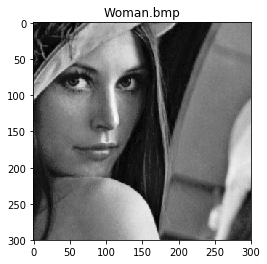

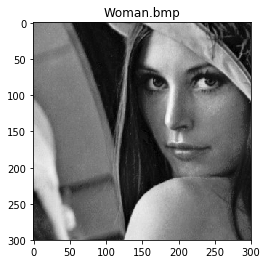

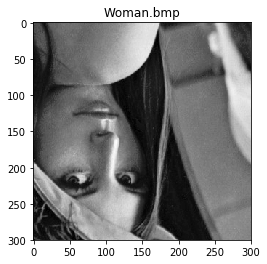

In [8]:
img = rg(files[4])

def flip_image(im_data, flag):
    im_flip = cv2.flip(im_data, flag) # flag=1 flip arround y-axis; flag=0 flip arround x-axis 
    return im_flip

vert = flip_image(img, 1)
hor = flip_image(img, 0)
ls = [img, vert, hor]

for i in ls:
    mplt.figure()
    mplt.imshow(i, cmap='gray')
    mplt.title(files[4])

<b>3. </b> Write a function to generate the negative of an image. This means that  a new image is created in which the pixel values are all equal to 1.0 minus the pixel value in the original image. <br /> <br />

Para este punto, primero guardamos la imagen que deseamos utilizar en la variable img. Seguidamente creamos la función neg_im() que no posee parámetros y se encarga de restar 255 a la imagen original. En la variable image, llamamos la función y almacenamos el resultado para luego mostrarlo en una figura con la imagen original para ver el contraste entre las dos.

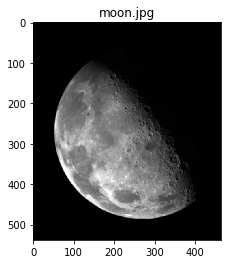

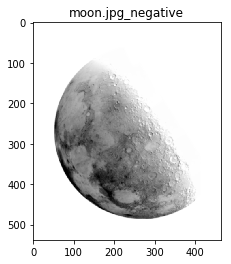

In [11]:
img = rg(files[1])

def neg_im():
    im = 255 - img
    return im
        
image = neg_im()
    
mplt.figure()
mplt.imshow(img, cmap='gray')
mplt.title(files[1])

mplt.figure()
mplt.imshow(image, cmap='gray')
mplt.title(files[1]+'_negative')

<b>4. </b>Write a function <code>average_intensity</code>, which calculates the average intensity level of an image. Use this function on example images and discuss your results. You can use images from section 2 and 3 <br /> <br />

La función *average_intensity* recibe como parámetros la matriz en escala de grises de la imagen y retorna el valor medio de esta `img.mean()`. Para probar la función anterior se iteró sobre la lista `files` del siguiente modo: se creó una lista de intensidades `[avg ... for i in ...]`, se crea una tupla para cada intensidad con su nombre de archivo respectivo; cada tupla es desempacada en un ciclo `for` donde se muestra el mensaje al usuario.

In [4]:
def average_intensity(img):
    return img.mean()

for avg, name in zip([average_intensity(rg(i)) for i in files], files):
    print 'Average intensity of "', name, '":', avg

Average intensity of " cameraman.png ": 118.724487305
Average intensity of " moon.jpg ": 42.6058197667
Average intensity of " rose.bmp ": 46.7893533707
Average intensity of " skull.bmp ": 129.390096304
Average intensity of " Woman.bmp ": 93.2467
Average intensity of " hut.jpg ": 89.242855072
Average intensity of " new_cameraman.png ": 118.724487305


<b>5. </b>Write a function <code>threshold_image</code> which thresholds an image based on a threshold level given as a parameter to the function. The function should take two parameters: the image to be thresholded and the threshold level. The result of the function should be a new thresholded image. <br /> <br />

La función `threshold_image` toma como parámetros la matriz de la imagen y un entero que indica el punto para hacer la umbralización; el interior de esta función es simple: se llama la función **threshold** de OpenCV, con la opción de que la imagen resultante sea binaria invertida; esta función retorna una tupla, de la cual solo nos interesa el segundo valor (el primero sería el valor de umbral óptimo, si se llamase la función **threshold** con `th=0`). La imagen obtenida luego se muestra con Matplotlib.

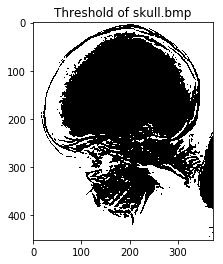

In [6]:
def threshold_image(img, th):
    # ignore retVal parameter, no Otsu binarization will be applied
    _, t = cv2.threshold(img, th, 255, cv2.THRESH_BINARY_INV)
    return t

img = threshold_image(rg(files[3]), 150)
mplt.figure()
mplt.imshow(img, cmap='gray')
mplt.title('Threshold of ' + files[3])

<b>6. </b>Write a function avg_intensity_threshold_image which takes an image as its only parameter and thresholds this image based on the images average intensity value. <b>Hint:</b> Simply write a new function that uses the two functions just written. <br /> <br />

La función `avg_intensity_threshold_image` es muy simple, es solo llamar la función del ejercicio anterior pero siendo el segundo parámetro el promedio de intensidad de la imagen (función realizada en el punto 4). Luego se aplica la operación a varias imágenes y se muestran en pantalla.

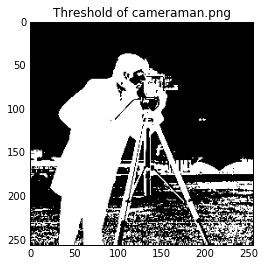

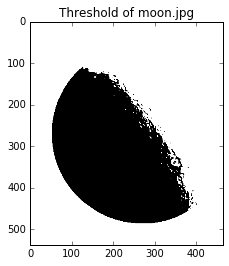

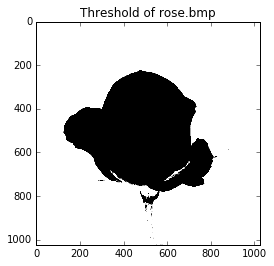

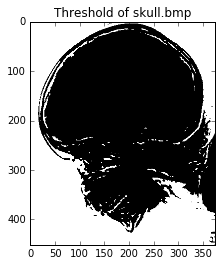

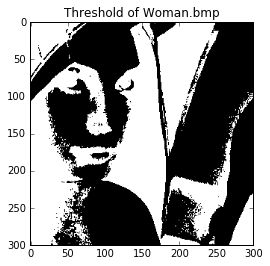

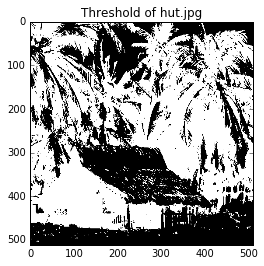

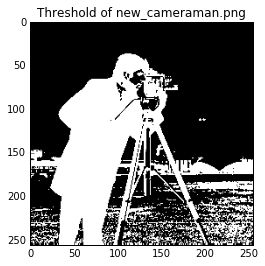

In [6]:
def avg_intensity_threshold_image(img):
    return threshold_image(img, average_intensity(img))

ths = [avg_intensity_threshold_image(rg(i)) for i in files]
for t, name in zip(ths, files):
    mplt.figure()
    mplt.imshow(t, cmap='gray')
    mplt.title('Threshold of ' + name)

<b>7. </b>Write a function which subsamples a grayscale image of size 512x512 by factors of 2, i.e., 256, 128, 64 and display your results. There are multiple ways to do this as discussed in the textbook. You may simply sub-sample, average, etc.  Describe which you used and why.

<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="256" width="256">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="128" width="128">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="64" width="64">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="32" width="32">

Lo primero que se hace es verificar que la imagen sea del tamaño indicado, si esto sucede, se muestra la imagen base. Luego se submuestrea la imagen N veces (dentro de un ciclo); el submuestreo se realiza con la función de OpenCV `pyrDown` que realiza la submuestra a la mitad. En caso que N sea muy grande el ciclo se rompe a la novena iteración.

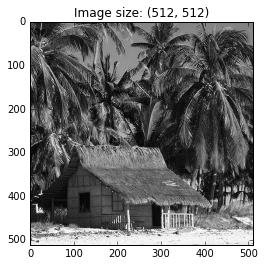

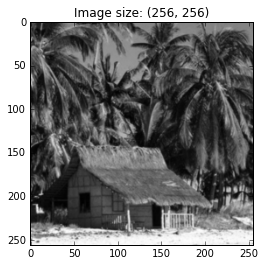

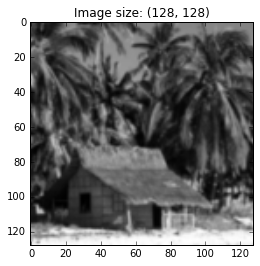

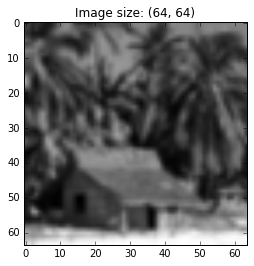

In [7]:
def downSampling(src,N):
    '''Downsample an image N times. 
       src: Image data
       N:   Number of subsamples(it must be lower than 9) 
       [!] if N is too large it will display the max amount of samples
    '''
    
    if src.shape[:2] != (512,512) : # image(512x512) verification
        print("[!] Image is not 512x512")
    else:
        # Plotting the base image
        mplt.figure()
        mplt.imshow(src, cmap='gray')
        mplt.title("Image size: "+str(src.shape[:2]))
        n = 1
        # Loop for plotting the N subsamples
        while(n <= N):
            src = cv2.pyrDown(src) # subsample to 1/2
            mplt.figure()
            mplt.imshow(src, cmap='gray')
            mplt.title("Image size: "+str(src.shape[:2]))
            n += 1
            if n >= 9: # Condition in the case of 'N' been too large
                return
            
pic = rg(files[5])
downSampling(pic, 3)
            

<b>8. </b>Keeping your original image resolution reduce the number of gray levels in your image from 256 to 2 in powers of 2. Display your results.

Partamos de la idea general: se quiere reducir el número de niveles de grises a potencias de 2, esto es se puede elegir si se quieren <br>
2, 4, 8, 16, 32, 64, 128 o 256<br>
niveles de grises. La idea que el código en la celda de abajo utiliza es la siguiente: Se tiene la imagen convencional con valores normales (0 a 256), para cada uno de estos valores se quiere encontrar su correspondiente imagen en un dominio reducido de potencias de 2. Esto se soluciona con un **lookup table**. Un **lookup table** funciona del siguiente modo:<br>
Imagine que se quieren 4 niveles de grises:
<code>
Estos son [a, b, c, d]
</code>
Imagine que existe una función que crea un arreglo de 256 elementos, pero estos elementos nada más pueden ser **a, b, c** o **d**:
<code>
A = crearTablaLookUP([a,b,c,d])
</code>
Como A, tiene 256 elementos, cualquier valor de intensidad de la imagen es un índice adecuado para A. De modo que para solucionar el problema basta iterar sobre todos los valores de la imagen y reemplazarlos por su correspondiente valor en A:
<code>
imagen-final = A[i] para todo i en la imagen original.

Ejemplo: A[255] = d
         A[0] = a
</code>
Lo anterior resume el código de abajo; ahora lo explicaremos por secciones, de la 1 a la 8 (vea el código):

1. Se selecciona el número de niveles deseados,

2. Se crea una lista con las posibles intensidades para los respectivos niveles deseados, ej. 4 niveles, posibles niveles = (255/3)*[0,1,2,3] = [0, 85, 170, 255]. Esto es, se hace un espaciado equitativo,

3. Se crea una lista con los números del 0 al 255,

4. Se crea una matriz de distancias, con número de filas igual al número de niveles deseados y número de columnas igual a 256 (su uso se explicará luego: sirve para crear A),

5. Para cada fila de la matriz de distancia le asignamos el valor absoluto de la resta entre el nivel correspondiente a cada fila y la lista creada en el punto 3. Visualmente es algo similar a lo siguiente 
<code>
distancias = [
              [   0 - [0 1 2 ...85 ... 170 ... 255] ],
              [  85 - [0 1 2 ...85 ... 170 ... 255] ],
              [ 170 - [0 1 2 ...85 ... 170 ... 255] ],
              [ 255 - [0 1 2 ...85 ... 170 ... 255] ],
             ]
</code>

6. Comparamos los elementos de cada columna de la matriz de distancias entre ellos mismos y seleccionamos el índice (contando de arriba a abajo por columna) donde se encuentra el menor. Para clarificar esto observe:
<code>
distancias = [
              [   0 - [0 1 2 ...85 ... 170 ... 255] ],
              [  85 - [0 1 2 ...85 ... 170 ... 255] ],
              [ 170 - [0 1 2 ...85 ... 170 ... 255] ],
              [ 255 - [0 1 2 ...85 ... 170 ... 255] ],
             ]
           = [ # Recuerde que es el valor absoluto
              [  0   1   2 ... 85 ... 170 ... 255],
              [ 85  84  83 ...  0 ...  85 ... 170],
              [170 169 168 ... 85 ...   0 ...  85],
              [255 254 253 ...170 ...  85 ...   0],
\#                0   1   2      0       0       0  Menores por columna
\#                0   0   0 ...  1 ...   2 ...   3  Indices en que estan los menores, vistos verticalemente
             ]
</code>
Todo lo anterior lo realiza una función de numpy llamada **argmin** con segundo argumento 0 para que compare por columnas. Es claro que el arreglo que arroja es de 256 números, pero los números están en el rango<br> 
0 a el número de niveles deseados - 1<br>
Reemplazamos cada valor de la lista por su equivalente en la lista de niveles creada en 2. Ejemplo:
<code>
\# l_actual = [0 0 0 0 ... 1 1 1 1 1 ... 2 2 2 2 2 ... 3 3 3 3 3]
   l_nuevo  = lista_niveles[l_actual]
\# l_nuevo  = [0 0 0 ... 85 85 85 ... 170 170 170 ... 255 255 255] 
</code>
La lista obtenida es la lista **A** que se había comentado al principio. (*Look Up Table*)

7. Se pasa la lista obtenida a un arreglo de numpy,

8. Cada valor de la imagen se reemplaza por su respectivo valor en **A**. Esto lo hace automáticamente una función de OpenCV llamada **LUT**,

9. Se muestra el resultado.


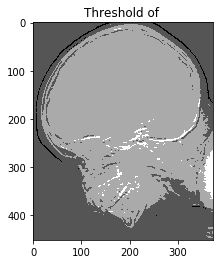

In [28]:
img = rg(files[3])

# 1
num_levels = 4

# 2
step = 255.0/(num_levels-1)
list_levels = step*np.arange(0, num_levels)

# 3
orig_levels = np.arange(0,256)

# 4
distance = np.zeros((num_levels,256))

# 5
for level_id in range(0,num_levels):
    distance[level_id, :] = abs(list_levels[level_id]-orig_levels)

# 6
LUT_quant = list_levels[np.argmin(distance, 0)]

# 7
LUT_quant = np.uint8(LUT_quant)

# 8
img_th = cv2.LUT(img, LUT_quant)

# 9
mplt.figure()
mplt.imshow(img_th, cmap='gray')
mplt.title('Threshold of ')